In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/nikau/OneDrive/Desktop/IOD/DataSets/regression data sets/Fish.csv")

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Basic EDA

In [4]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


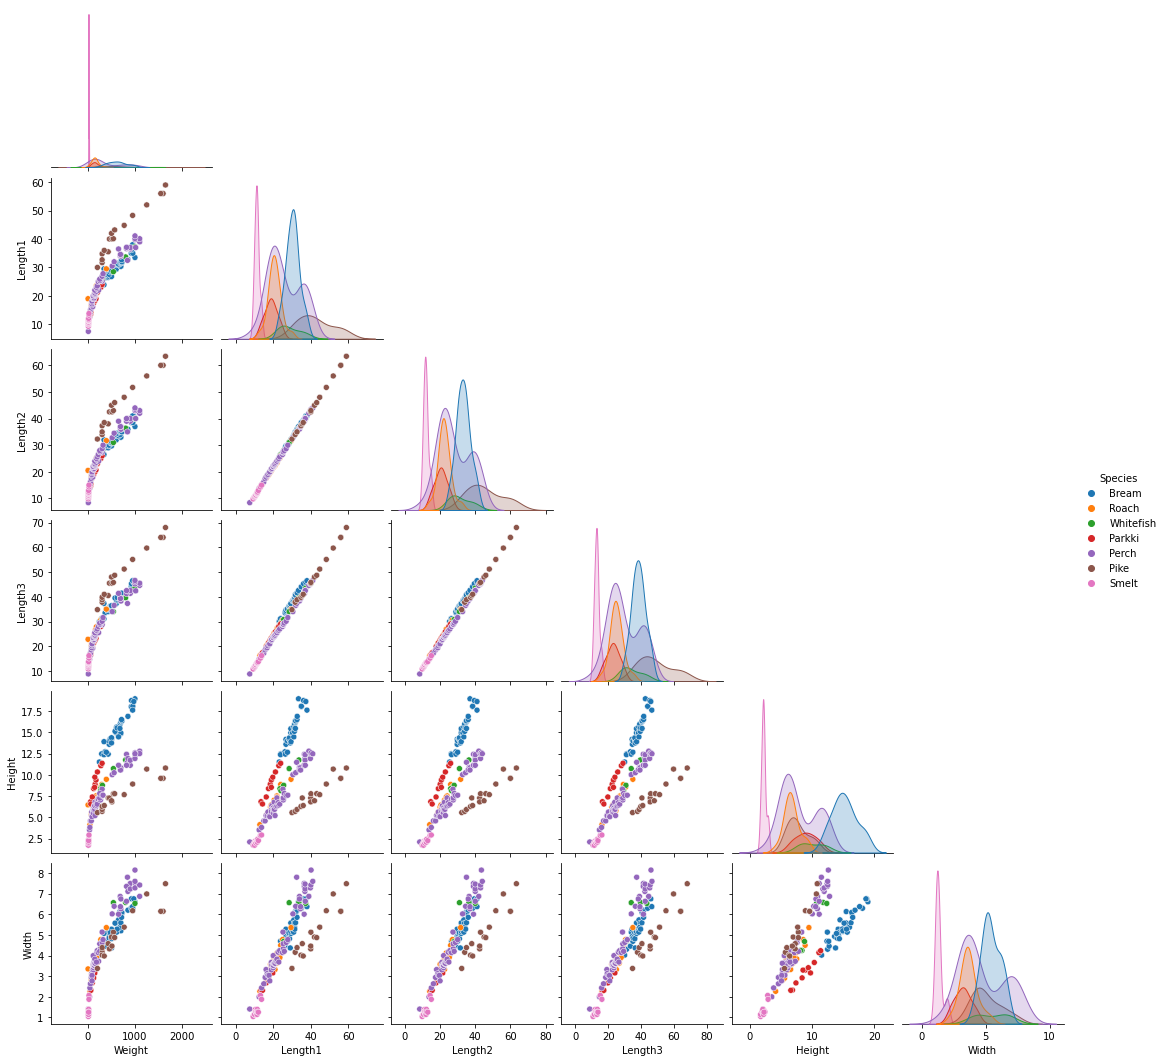

In [9]:
sns.pairplot(df, hue='Species', corner=True)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='count'>

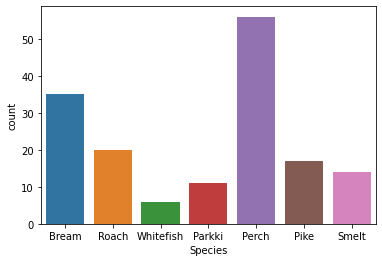

In [10]:
sns.countplot(x=df['Species'], data=df)

In [6]:
dummies = pd.get_dummies(df.Species)
dummies

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
154,0,0,0,0,0,1,0
155,0,0,0,0,0,1,0
156,0,0,0,0,0,1,0
157,0,0,0,0,0,1,0


In [7]:
df2 = pd.concat([df,dummies],axis='columns')
df2.drop(['Species'],axis=1, inplace=True)

In [8]:
df2

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


# Applying Test Train Split

splitting the model into X and Y variables

In [10]:
y = df2.Weight 
X = df2.drop(['Weight'], axis=1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

fitting the model

In [12]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

Actual vs Preditced Values

In [14]:
y_pred = lr_model.predict(X_test)

df_preds = pd.DataFrame({'Actual':y_test.squeeze(),'Predicted':y_pred.squeeze()})
df_preds.head(10)

,Actual,Predicted
35,40.0,-207.454545
85,130.0,165.413895
47,160.0,96.306020
24,700.0,729.058038
129,300.0,323.796176
95,170.0,231.071181
128,200.0,215.484608
10,475.0,528.767781
58,540.0,519.716967
104,265.0,359.943409


accuracy values

In [13]:
print('The accuracy is:', lr_model.score(X_test,y_test))
print('The intercept is:', lr_model.intercept_)
# print('coefficients are ', lr_model.coef_)

The accuracy is: 0.8241603153034743
The intercept is: -847.4384920488043


# Plotting Coefficients

In [15]:
def view_coeff(X, lr_model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': lr_model.coef_,
                                'abs_coef': np.abs(lr_model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

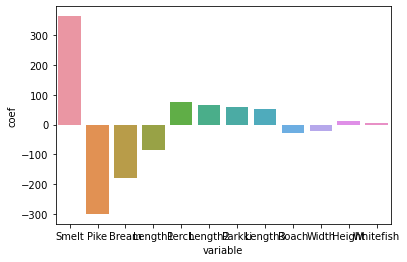

In [16]:
# Plot Coefficients
view_coeff(X, lr_model)

# Lasso Regression

In [17]:
# lasso regression
# the lasso regression model gives better accuracy than the linear regression model

from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=2, selection='random')
lasso_model.fit(X_train,y_train)

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203682.47254102712, tolerance: 1817.9566577952755
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2, selection='random')

In [19]:
print('The accuracy:', lasso_model.score(X_test,y_test))
print('The intercept is ', lasso_model.intercept_)
# print('coefficients are ', lasso_model.coef_)

The accuracy: 0.8564122939417225
The intercept is  -673.2105331382896


# Ridge Regression

In [20]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [27]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, lr_model.coef_))

# Visual Representation of Coefficient of Ridge Model

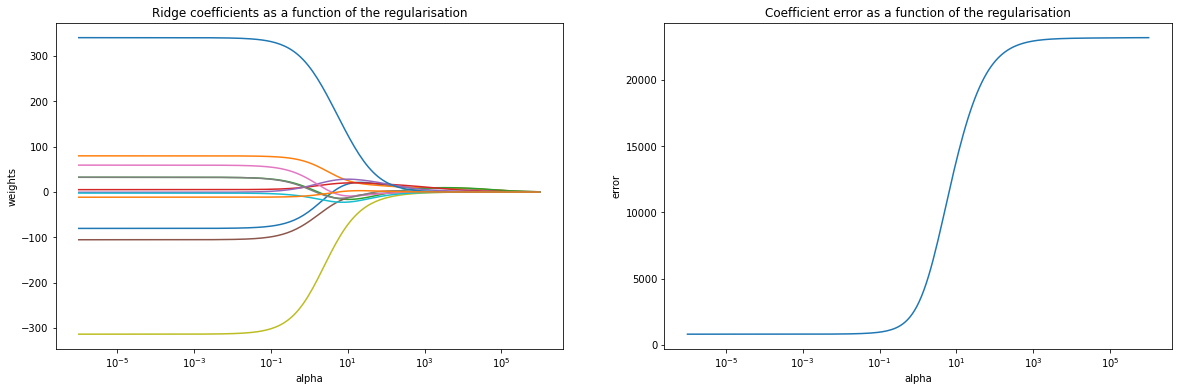

In [28]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

# Find an optimal value for Ridge regression alpha using RidgeCV

In [30]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 6.51733960488242
Score: 0.9205018461159038


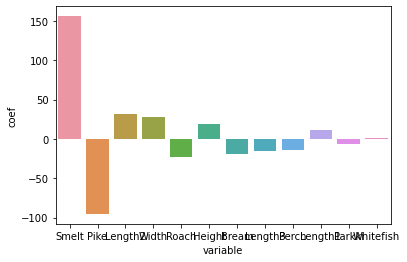

In [31]:
view_coeff(X, optimal_ridge)

# Evaluating the Model

In [35]:
#Evaluating the Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 =  r2_score(y_test,y_pred)

In [37]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'R^2 error: {r2:.2f}')

Mean absolute error: 68.44
Mean squared error: 6742.97
Root mean squared error: 82.12
R^2 error: 0.82


In [39]:
#current model explains only _% of our train data
print('Training score ',lr_model.score(X_train, y_train))
print('Testing score ',lr_model.score(X_test, y_test))

Training score  0.9386500419713845
Testing score  0.8241603153034743


Text(0.5, 1.0, 'Test(Blue) vs Predicted(Red)')

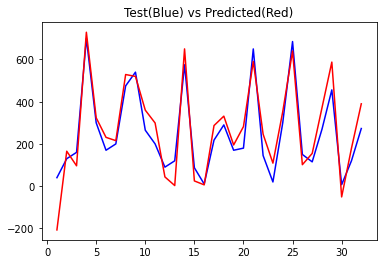

In [44]:
c = [i for i in range(1,33,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')
plt.title('Test(Blue) vs Predicted(Red)')